### Подключаем пакет

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

In [2]:
# DJI
#url='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
# NASDAQ
#url='https://finance.yahoo.com/quote/%5EIXIC/components?p=%5EIXIC'
# wiki DJI
url= 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
pd.read_html(url)[1]

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%
5,Caterpillar,NYSE,CAT,Construction and Mining,1991-05-06,NaN,4.52%
6,Chevron,NYSE,CVX,Petroleum industry,2008-02-19,Also 1930-07-18 to 1999-11-01,3.50%
7,Cisco,NASDAQ,CSCO,Information technology,2009-06-08,NaN,0.96%
8,Coca-Cola,NYSE,KO,Drink industry,1987-03-12,Also 1932-05-26 to 1935-11-20,1.22%
9,Disney,NYSE,DIS,Broadcasting and entertainment,1991-05-06,NaN,1.89%


## Диверсификация портфеля
### Загрузка данных

In [3]:
#Импортируем перечень бумаг 
import pandas as pd
url= 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'

df = pd.read_html(url)[1]
df.head()


,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,2.41%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.02%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,5.48%
3,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,2.84%
4,Boeing,NYSE,BA,Aerospace and defense,1987-03-12,NaN,3.36%


In [4]:
#Выгружаем тикера и названия компаний
names=df[['Symbol','Company']]
symbol=names['Symbol'].values
full_name=names['Company'].values
print(symbol)
print(full_name)

['MMM' 'AXP' 'AMGN' 'AAPL' 'BA' 'CAT' 'CVX' 'CSCO' 'KO' 'DIS' 'DOW' 'GS'
 'HD' 'HON' 'IBM' 'INTC' 'JNJ' 'JPM' 'MCD' 'MRK' 'MSFT' 'NKE' 'PG' 'CRM'
 'TRV' 'UNH' 'VZ' 'V' 'WBA' 'WMT']
['3M' 'American Express' 'Amgen' 'Apple' 'Boeing' 'Caterpillar' 'Chevron'
 'Cisco' 'Coca-Cola' 'Disney' 'Dow' 'Goldman Sachs' 'Home Depot'
 'Honeywell' 'IBM' 'Intel' 'Johnson & Johnson' 'JPMorgan Chase'
 "McDonald's" 'Merck' 'Microsoft' 'Nike' 'Procter & Gamble' 'Salesforce'
 'Travelers' 'UnitedHealth Group' 'Verizon' 'Visa'
 'Walgreens Boots Alliance' 'Walmart']


In [5]:
# pip install yfinance     # установить
# pip install yfinance -U  # обновить

# pip install pandas_datareader


# ВАЖНО ПЕРЕЗАПУСТИТЬ ЯДРО

In [6]:
df.groupby('Exchange')['Symbol'].count()

Exchange
NASDAQ     7
NYSE      23
Name: Symbol, dtype: int64

In [7]:
import pandas_datareader
import pandas_datareader.data as web
print(pandas_datareader.__version__)

0.10.0


In [8]:
#web.DataReader('GE', 'yahoo', start='2019-09-10', end='2019-09-30')
web.DataReader('GE', 'stooq',  start='2019-09-10', end='2019-09-30')

,Open,High,Low,Close,Volume
Date,,,,,
2019-09-30,71.6710,71.8294,70.5658,70.5658,4.479295e+06
2019-09-27,71.3561,72.3816,70.9634,71.3561,3.866678e+06
2019-09-26,72.4613,72.6985,70.7243,71.1986,4.765225e+06
2019-09-25,70.7243,72.5808,70.5269,72.3018,5.572299e+06
2019-09-24,73.4888,73.8007,70.7243,70.8040,6.825886e+06
2019-09-23,72.7752,74.1196,72.6207,73.7230,4.314842e+06
2019-09-20,74.6718,75.3056,73.7230,73.9601,7.380453e+06
2019-09-19,73.8007,74.9857,73.7230,74.3568,4.323562e+06
2019-09-18,73.4888,74.1196,72.4613,74.0399,5.144985e+06


In [9]:
symbol

array(['MMM', 'AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO',
       'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM',
       'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V',
       'WBA', 'WMT'], dtype=object)

In [12]:
import yfinance as yf
import datetime

start = datetime.datetime(2020, 6, 1)
end = datetime.datetime(2021, 2, 28)

data = yf.download(list(symbol), start=start, end=end)['Close']
data

[*********************100%***********************]  30 of 30 completed


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,80.462502,226.910004,96.750000,151.389999,120.500000,176.360001,46.299999,92.790001,118.769997,38.610001,...,75.916031,182.830002,99.540001,117.250000,109.150002,305.929993,194.350006,55.779999,43.299999,123.959999
2020-06-02,80.834999,223.720001,99.070000,153.309998,123.320000,174.229996,46.889999,94.690002,118.750000,40.599998,...,77.137405,184.910004,100.739998,118.059998,111.000000,306.309998,196.360001,56.400002,43.549999,123.940002
2020-06-03,81.279999,221.000000,105.400002,173.160004,127.089996,174.990005,46.939999,97.180000,122.180000,41.630001,...,78.301529,185.360001,104.110001,118.529999,114.470001,305.350006,196.869995,56.830002,43.610001,123.470001
2020-06-04,80.580002,220.880005,106.540001,184.300003,128.960007,171.440002,46.860001,96.279999,123.690002,42.709999,...,77.814888,182.919998,101.279999,116.050003,118.000000,298.079987,193.639999,57.220001,44.200001,122.110001
2020-06-05,82.875000,225.669998,109.730003,205.429993,135.119995,173.880005,47.830002,100.809998,124.820000,43.970001,...,78.492363,187.199997,102.709999,118.330002,124.360001,311.850006,199.610001,57.740002,45.349998,121.559998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,126.000000,231.470001,135.949997,212.880005,218.059998,240.949997,45.430000,98.389999,191.759995,62.480000,...,71.498093,234.509995,136.669998,126.580002,147.869995,327.640015,208.320007,56.450001,48.860001,137.690002
2021-02-23,125.860001,232.460007,136.940002,212.119995,220.179993,235.639999,45.509998,99.629997,197.089996,62.119999,...,71.125954,233.270004,136.130005,127.519997,149.330002,329.510010,212.110001,57.029999,48.410000,135.470001
2021-02-24,125.349998,229.990005,139.889999,229.339996,222.470001,240.470001,45.740002,103.309998,197.509995,63.689999,...,71.154579,234.550003,135.649994,127.660004,150.960007,332.209991,219.429993,57.119999,49.169998,133.210007


In [13]:
# import datetime


# start = datetime.datetime(2020, 6, 1)
# end = datetime.datetime(2021, 2, 28)

# data_exchange={}

# for s in symbol:
#       data_exchange[s] =  yf.download(s, start=start, end=end)



# data_exchange

In [14]:
# data_exchange["MMM"]

In [15]:
# data_exchange['MMM']['Close']

In [16]:
# price = pd.DataFrame({ tic: data_exchange[tic]['Close'] for tic in symbol })
# price.head()
# # Вариант 2 (этой же команды)
# # price = pd.DataFrame({ tic: data['Close'] for tic, data in data_exchange.items() })
# # price.head()
price = data

In [17]:
price = price.dropna( thresh = 0.91*len(price.index) , axis='columns')
price

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-01,80.462502,226.910004,96.750000,151.389999,120.500000,176.360001,46.299999,92.790001,118.769997,38.610001,...,75.916031,182.830002,99.540001,117.250000,109.150002,305.929993,194.350006,55.779999,43.299999,123.959999
2020-06-02,80.834999,223.720001,99.070000,153.309998,123.320000,174.229996,46.889999,94.690002,118.750000,40.599998,...,77.137405,184.910004,100.739998,118.059998,111.000000,306.309998,196.360001,56.400002,43.549999,123.940002
2020-06-03,81.279999,221.000000,105.400002,173.160004,127.089996,174.990005,46.939999,97.180000,122.180000,41.630001,...,78.301529,185.360001,104.110001,118.529999,114.470001,305.350006,196.869995,56.830002,43.610001,123.470001
2020-06-04,80.580002,220.880005,106.540001,184.300003,128.960007,171.440002,46.860001,96.279999,123.690002,42.709999,...,77.814888,182.919998,101.279999,116.050003,118.000000,298.079987,193.639999,57.220001,44.200001,122.110001
2020-06-05,82.875000,225.669998,109.730003,205.429993,135.119995,173.880005,47.830002,100.809998,124.820000,43.970001,...,78.492363,187.199997,102.709999,118.330002,124.360001,311.850006,199.610001,57.740002,45.349998,121.559998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,126.000000,231.470001,135.949997,212.880005,218.059998,240.949997,45.430000,98.389999,191.759995,62.480000,...,71.498093,234.509995,136.669998,126.580002,147.869995,327.640015,208.320007,56.450001,48.860001,137.690002
2021-02-23,125.860001,232.460007,136.940002,212.119995,220.179993,235.639999,45.509998,99.629997,197.089996,62.119999,...,71.125954,233.270004,136.130005,127.519997,149.330002,329.510010,212.110001,57.029999,48.410000,135.470001
2021-02-24,125.349998,229.990005,139.889999,229.339996,222.470001,240.470001,45.740002,103.309998,197.509995,63.689999,...,71.154579,234.550003,135.649994,127.660004,150.960007,332.209991,219.429993,57.119999,49.169998,133.210007


In [18]:
result_corr = price.corr()
display(result_corr.head())
np.fill_diagonal(result_corr.values,0.)
result_corr.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,1.000000,-0.000948,0.654702,0.405596,0.809499,0.647281,-0.141931,-0.069730,0.785200,0.806720,...,0.143918,0.845017,0.846282,0.627976,0.662660,0.748853,0.648608,0.282934,0.255906,0.803838
AMGN,-0.000948,1.000000,-0.298422,-0.334605,-0.250900,0.013796,0.093815,-0.112598,-0.224790,-0.229035,...,0.283915,0.115445,-0.308763,-0.035095,-0.305559,-0.228560,-0.071032,-0.130199,-0.005347,-0.127560
AXP,0.654702,-0.298422,1.000000,0.832331,0.896411,0.277462,0.274526,0.509486,0.920177,0.915004,...,-0.162141,0.622585,0.797961,0.119674,0.903349,0.721225,0.724605,0.127038,0.636955,0.553480
BA,0.405596,-0.334605,0.832331,1.000000,0.630062,-0.063643,0.522913,0.690006,0.753755,0.669147,...,-0.158864,0.399780,0.552627,-0.102679,0.798406,0.575606,0.608500,0.079910,0.612684,0.341125
CAT,0.809499,-0.250900,0.896411,0.630062,1.000000,0.486518,0.010531,0.198957,0.915941,0.970549,...,-0.190091,0.751356,0.917827,0.377094,0.892463,0.795881,0.635298,0.116486,0.489606,0.730138


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.000000,-0.000948,0.654702,0.405596,0.809499,0.647281,-0.141931,-0.069730,0.785200,0.806720,...,0.143918,0.845017,0.846282,0.627976,0.662660,0.748853,0.648608,0.282934,0.255906,0.803838
AMGN,-0.000948,0.000000,-0.298422,-0.334605,-0.250900,0.013796,0.093815,-0.112598,-0.224790,-0.229035,...,0.283915,0.115445,-0.308763,-0.035095,-0.305559,-0.228560,-0.071032,-0.130199,-0.005347,-0.127560
AXP,0.654702,-0.298422,0.000000,0.832331,0.896411,0.277462,0.274526,0.509486,0.920177,0.915004,...,-0.162141,0.622585,0.797961,0.119674,0.903349,0.721225,0.724605,0.127038,0.636955,0.553480
BA,0.405596,-0.334605,0.832331,0.000000,0.630062,-0.063643,0.522913,0.690006,0.753755,0.669147,...,-0.158864,0.399780,0.552627,-0.102679,0.798406,0.575606,0.608500,0.079910,0.612684,0.341125
CAT,0.809499,-0.250900,0.896411,0.630062,0.000000,0.486518,0.010531,0.198957,0.915941,0.970549,...,-0.190091,0.751356,0.917827,0.377094,0.892463,0.795881,0.635298,0.116486,0.489606,0.730138


In [19]:
result=(abs(result_corr)>=0.8).astype(int)
#result=(result_corr>=0.9).astype(int)
result.head()

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
AMGN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AXP,0,0,0,1,1,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
BA,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CAT,1,0,1,0,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0


In [20]:
import matplotlib.pyplot as plt
import networkx as nx

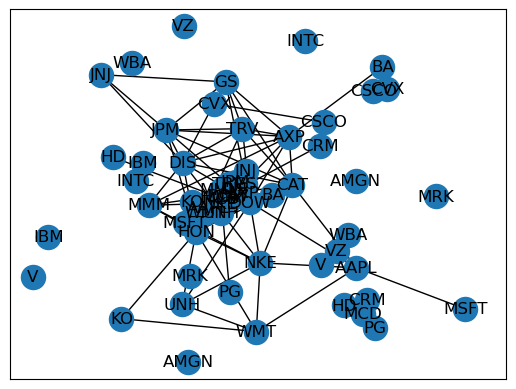

In [21]:
A=result.values
G=nx.from_numpy_matrix(A)
mapping=dict(zip(G.nodes(),result.index))

G1=nx.relabel_nodes(G,mapping)

nx.draw_networkx(G1)
nx.draw_networkx(G1,pos=nx.kamada_kawai_layout(G1))
plt.show()

In [22]:
clique=list(nx.find_cliques(G1))
print(clique)
max_clique=max(clique,key=len)
print()
print("максимальная ",max_clique)

[['MRK'], ['CVX', 'CSCO'], ['PG', 'MCD'], ['JNJ', 'DIS', 'JPM', 'GS'], ['BA', 'AXP'], ['INTC'], ['VZ'], ['GS', 'CAT', 'TRV', 'DIS', 'JPM', 'AXP', 'DOW'], ['AMGN'], ['WBA'], ['IBM'], ['MSFT', 'AAPL'], ['CRM', 'MCD'], ['V'], ['MCD', 'HD'], ['HON', 'WMT', 'NKE', 'UNH'], ['HON', 'WMT', 'KO'], ['HON', 'DOW', 'UNH', 'NKE'], ['HON', 'DOW', 'CAT', 'DIS', 'NKE', 'MMM'], ['HON', 'DOW', 'CAT', 'DIS', 'AXP', 'JPM', 'TRV'], ['HON', 'DOW', 'CAT', 'DIS', 'AXP', 'MMM'], ['AAPL', 'NKE', 'CAT', 'DOW'], ['AAPL', 'NKE', 'WMT']]

максимальная  ['GS', 'CAT', 'TRV', 'DIS', 'JPM', 'AXP', 'DOW']


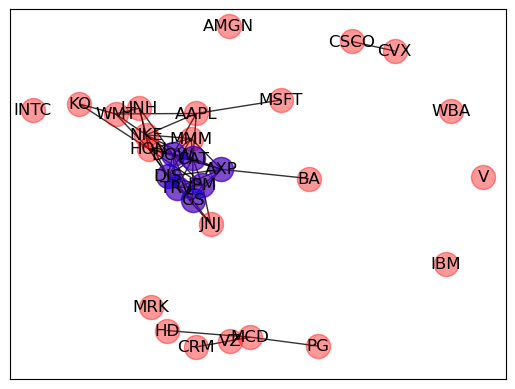

In [23]:
pos = nx.spring_layout(G1,dim=2,k=0.5)
nx.draw_networkx_nodes(G1,pos,node_color='r',alpha=0.4)
nx.draw_networkx_nodes(G1,pos,nodelist=max_clique,node_color='b',alpha=0.5)
nx.draw_networkx_edges(G1,pos,width=1.0,alpha=0.8)
nx.draw_networkx_labels(G1,pos)
plt.show()


In [24]:
# Имена бумаг в клике
max_clique_name=names.loc[names['Symbol'].isin(max_clique)]
display(max_clique_name)
# Только имена бумаг
print(max_clique_name['Company'].values)

,Symbol,Company
1,AXP,American Express
5,CAT,Caterpillar
9,DIS,Disney
10,DOW,Dow
11,GS,Goldman Sachs
17,JPM,JPMorgan Chase
24,TRV,Travelers


['American Express' 'Caterpillar' 'Disney' 'Dow' 'Goldman Sachs'
 'JPMorgan Chase' 'Travelers']


In [25]:
no_max_clique_name=names.loc[~names['Symbol'].isin(max_clique)]
no_max_clique_name

,Symbol,Company
0,MMM,3M
2,AMGN,Amgen
3,AAPL,Apple
4,BA,Boeing
6,CVX,Chevron
7,CSCO,Cisco
8,KO,Coca-Cola
12,HD,Home Depot
13,HON,Honeywell
14,IBM,IBM


In [26]:
df=pd.DataFrame(price, columns=max_clique_name['Symbol'].values)
display(df.head(3))
display(df.shape)
display(df.describe())
df = df.pct_change().fillna(0).cumsum()
display(df.head())

,AXP,CAT,DIS,DOW,GS,JPM,TRV
Date,,,,,,,
2020-06-01,96.750000,120.500000,118.769997,38.610001,199.929993,98.599998,109.150002
2020-06-02,99.070000,123.320000,118.750000,40.599998,204.139999,98.930000,111.000000
2020-06-03,105.400002,127.089996,122.180000,41.630001,210.570007,104.269997,114.470001


(188, 7)

,AXP,CAT,DIS,DOW,GS,JPM,TRV
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,108.452234,160.175319,141.546010,49.397660,229.035532,111.209574,125.312819
std,12.234519,25.267594,25.111254,6.218593,38.149667,16.519530,12.713640
min,90.570000,120.500000,109.099998,38.450001,186.119995,91.279999,107.440002
25%,97.502502,138.277500,122.412498,43.992500,201.837505,98.500002,114.360001
50%,104.560001,155.945000,130.610001,48.650000,210.094994,102.360001,120.169998
75%,118.985003,179.342495,170.509998,54.662499,244.407494,122.115000,136.537498
max,139.889999,222.470001,197.509995,63.689999,330.640015,153.259995,150.960007


,AXP,CAT,DIS,DOW,GS,JPM,TRV
Date,,,,,,,
2020-06-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-06-02,0.023979,0.023402,-0.000168,0.051541,0.021057,0.003347,0.016949
2020-06-03,0.087874,0.053973,0.028716,0.076911,0.052555,0.057324,0.048210
2020-06-04,0.098689,0.068687,0.041075,0.102853,0.072739,0.078136,0.079048
2020-06-05,0.128631,0.116454,0.050210,0.132355,0.087169,0.123138,0.132946


<Figure size 300x300 with 0 Axes>

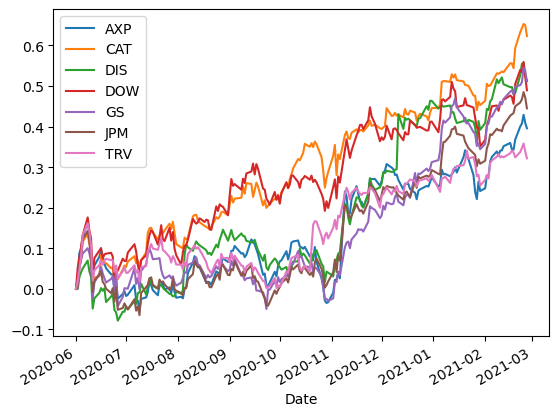

In [27]:
fig = plt.figure(figsize=(3, 3));
df.plot();
plt.show();

In [28]:
from pyvis.network import Network
net = Network(notebook=True, cdn_resources='remote')
net.from_nx(G1)
net.show("example.html")

example.html


In [39]:
from pyvis.network import Network
net = Network(notebook=True, cdn_resources='remote')

colours = []

for node in G1.nodes: 
    if node in max_clique:
        net.add_node(node, color='red')  # меняем цвет для узлов в максимальной клике
    else:
        net.add_node(node)

indices = np.argwhere(A == 1) # Ищем все элементы(пары индексов) в матрице смежности A, равные 1
# for idx in indices:
#     net.add_edge(mapping[idx[0]], mapping[idx[1]], color='black')
    

for e in G1.edges:
        if e in G1.edges:  # if the edge is part of sub-graph
            color = 'green'
            width = 2
#         else:
#             color = 'red'
#             width = 0.5
          G1.add_edge(int(e[0]), int(e[1]), color=color, width=width)
    
net.show("exampleend.html")
 
# net.add_nodes([i for i in range(len(result.index))], x=[value[0] for key, value in pos.items()], 
#               y=[value[1] for key, value in pos.items()], 
#               label=list(result.index),
#               color=colours)
 
# for i in range(len(A)):
#     for j in range(len(A[i])):
#         if A[i][j] == 1:
#             net.add_edge(i, j) 

# net.show("1.html")

exampleend.html


In [40]:
G1.edges

EdgeView([('AAPL', 'CAT'), ('AAPL', 'DOW'), ('AAPL', 'MSFT'), ('AAPL', 'NKE'), ('AAPL', 'WMT'), ('AXP', 'BA'), ('AXP', 'CAT'), ('AXP', 'DIS'), ('AXP', 'DOW'), ('AXP', 'GS'), ('AXP', 'HON'), ('AXP', 'JPM'), ('AXP', 'MMM'), ('AXP', 'TRV'), ('CAT', 'DIS'), ('CAT', 'DOW'), ('CAT', 'GS'), ('CAT', 'HON'), ('CAT', 'JPM'), ('CAT', 'MMM'), ('CAT', 'NKE'), ('CAT', 'TRV'), ('CRM', 'MCD'), ('CSCO', 'CVX'), ('DIS', 'DOW'), ('DIS', 'GS'), ('DIS', 'HON'), ('DIS', 'JNJ'), ('DIS', 'JPM'), ('DIS', 'MMM'), ('DIS', 'NKE'), ('DIS', 'TRV'), ('DOW', 'GS'), ('DOW', 'HON'), ('DOW', 'JPM'), ('DOW', 'MMM'), ('DOW', 'NKE'), ('DOW', 'TRV'), ('DOW', 'UNH'), ('GS', 'JNJ'), ('GS', 'JPM'), ('GS', 'TRV'), ('HD', 'MCD'), ('HON', 'JPM'), ('HON', 'KO'), ('HON', 'MMM'), ('HON', 'NKE'), ('HON', 'TRV'), ('HON', 'UNH'), ('HON', 'WMT'), ('JNJ', 'JPM'), ('JPM', 'TRV'), ('KO', 'WMT'), ('MCD', 'PG'), ('MMM', 'NKE'), ('NKE', 'UNH'), ('NKE', 'WMT'), ('UNH', 'WMT')])

In [33]:
max_clique

['GS', 'CAT', 'TRV', 'DIS', 'JPM', 'AXP', 'DOW']